In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\srika\Downloads\twitter_Sentimental_Analysis.csv")

In [3]:
# Data Exploration
print(df.shape)
print(df.info())
print(df.isnull().sum())

(1048575, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1048575 non-null  int64 
 1   ids       1048575 non-null  int64 
 2   date      1048575 non-null  object
 3   flags     1048575 non-null  object
 4   user      1048575 non-null  object
 5   comments  1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None
target      0
ids         0
date        0
flags       0
user        0
comments    0
dtype: int64


In [4]:
# Drop unnecessary columns
df = df.drop(['ids', 'date', 'flags', 'user'], axis=1)
df.head(10)

,target,comments
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [6]:
# Text Cleaning
def clear_text(comments):
    comments = re.sub(r'http\S+', '', comments)
    comments = re.sub(r'[^\w\s]', '', comments)
    comments = re.sub(r'\d', '', comments)
    comments = comments.lower()
    return comments

df['comments'] = df['comments'].apply(clear_text)
df.head()

,target,comments
0,0,switchfoot awww thats a bummer you shoulda ...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


In [9]:
# Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def text_preprocessing(comments):
    comments = comments.lower()
    words = nltk.word_tokenize(comments)
    words = [w for w in words if w not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

df['comments'] = df['comments'].apply(text_preprocessing)
print(stop_words)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ll', 'ourselves', 'myself', 'a', 'until', 'above', 'it', 'off', 'didn', 'while', "you'll", 'has', 'shouldn', 'very', 'needn', 'himself', "aren't", 'my', 'am', 'into', "couldn't", 'here', 'aren', 'just', "weren't", 'where', 'don', 'y', 'he', 'weren', 'ain', 'having', "hasn't", 'our', 'not', 've', 'was', "you'd", "you've", 'been', 'how', "wasn't", 'you', 'herself', 'whom', "hadn't", 'these', 'with', 'again', 'them', 'and', 'some', 'when', 'this', 'shan', 'against', 'hadn', 'i', 'if', 'as', 're', 'being', "that'll", 'own', 'hasn', 'to', 'what', 'through', 'mustn', 'then', 'yourself', "you're", 'other', 'are', 'before', 'theirs', 'only', 'in', 'is', 'have', 'why', 'they', "isn't", 'can', 'between', 'too', 'which', 'or', 'yours', 'by', 'who', 'do', 'yourselves', 'all', 'more', 'couldn', 'down', 'hers', "don't", 'his', 'during', 'an', 'their', 'themselves', 'because', 't', 'm', "she's", 'will', 'so', 'your', 'itself', 'after', 'there', 'on', 's', 'd', 'those', "haven't", 'over', "mustn't",

,target,comments
0,0,switchfoot awww thats bummer shoulda got david...
1,0,upset cant update facebook texting might cry r...
2,0,kenichan dived many times ball managed save re...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving im mad cant see


In [10]:
# Target Mapping
df['final_target'] = df['target'].map({0: 0, 4: 2, 'default': 1})
df.head()

,target,comments,final_target
0,0,switchfoot awww thats bummer shoulda got david...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,kenichan dived many times ball managed save re...,0
3,0,whole body feels itchy like fire,0
4,0,nationwideclass behaving im mad cant see,0


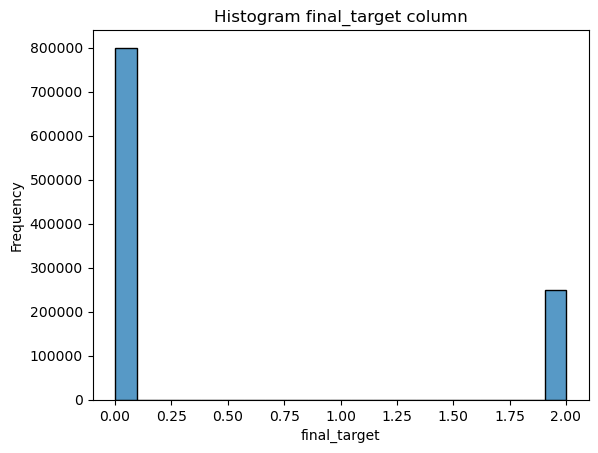

In [29]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['final_target'])
plt.title('Histogram final_target column')
plt.xlabel('final_target')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Train-Test Split
Independent_variable = df['comments']
Dependent_variable = df['final_target']
x_train, x_test, y_train, y_test = train_test_split(Independent_variable, Dependent_variable, test_size=0.1, random_state=225)
print('x_train : ',len(x_train))
print('x_test : ',len(x_test))
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

x_train :  943717
x_test :  104858
y_train :  943717
y_test :  104858


In [16]:
# Model Training
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs', max_iter=200000)
reg = Pipeline([('vectorizer', tvec), ('classifier', clf2)])
reg.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=200000))])

In [17]:
# Model Evaluation
prediction = reg.predict(x_test)
print('Confusion Matrix:', confusion_matrix(prediction, y_test))
print('Accuracy:', accuracy_score(prediction, y_test))
print('Precision:', precision_score(prediction, y_test, average='weighted'))
print('Recall Score:', recall_score(prediction, y_test, average='weighted'))

Confusion Matrix: [[75290 12272]
 [ 4566 12730]]
Accuracy: 0.8394209311640505
Precision: 0.8712907516165557
Recall Score: 0.8394209311640505


In [31]:
# Prediction
sample = ['bad']
result = reg.predict(sample)
print('Prediction for sample:', result)

Prediction for sample: [0]
